# In This Project we try to predict the Fishes weights based on some biological features. 

- Species: The name of the fish 
- Weight: Weight of the fish in G
- Length1: Vertical Length in CM
- Length2: Diognal Length in CM
- Length3: Cross Length in CM
- Height: Height in CM
- Width: Diognal width in CM 


This DataSet provided by Kaggle 
https://www.kaggle.com/aungpyaeap/fish-market


In [2]:
#import required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


#Discover The DataSet

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
#check the null values 
df.isnull().values.any()

False

In [8]:
#see the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

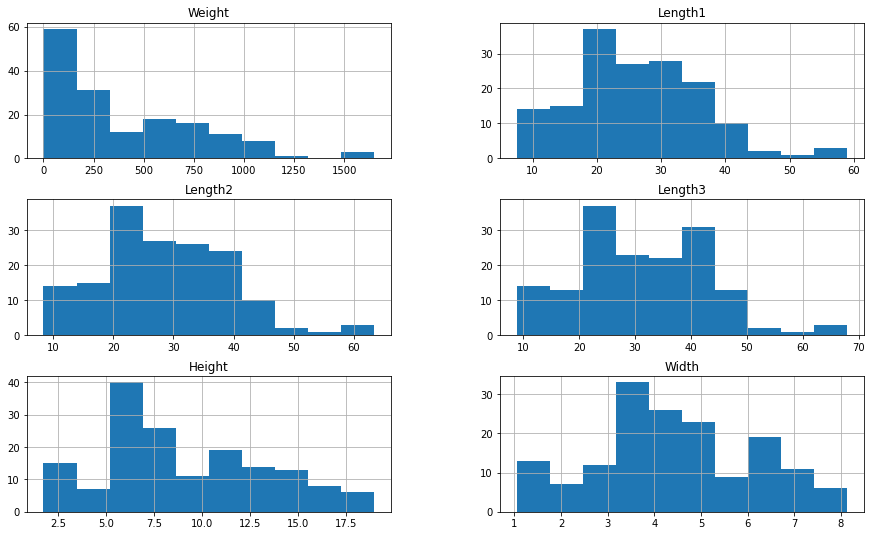

In [9]:
#counts of values of each column in the dataset
df.hist(figsize=(15, 9))


Text(0, 0.5, 'Weight')

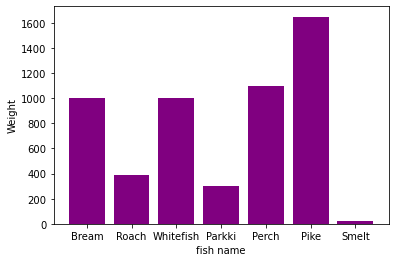

In [10]:
#fishes names and their weight 
plt.bar(df['Species'],df['Weight'],color="purple")
plt.xlabel("fish name")
plt.ylabel("Weight")

Pike, Perch, Whitefish, and Bream have the biggest weights respectively 

In [11]:
#see the correlations among variables
correlation = df.corr()
correlation

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

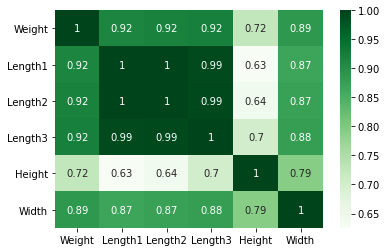

In [12]:
sns.heatmap(correlation, cmap = "Greens",annot=True)

The previous heatmap shows high correlation between length1&2&3 which lead to multicollinearity 

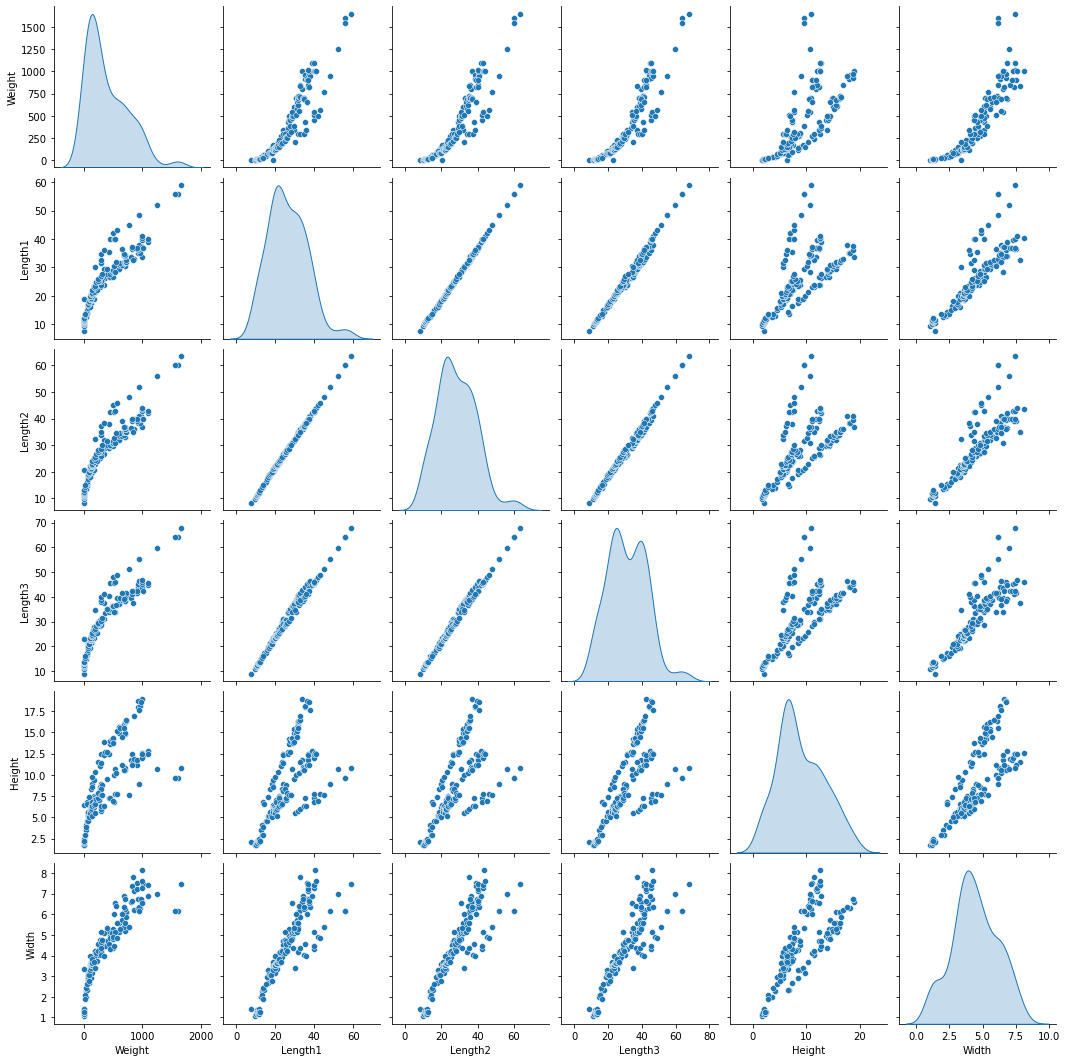

In [13]:
sns.pairplot(df[["Weight", "Length1", "Length2", "Length3", "Height", "Width"]],diag_kind ="kde")

In [14]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

From the previous statistics, we notice that the data contain 159 records with seven different fishes types and the mean of fishes weights is 398.326415. Also, the data did not include any null value.


In [15]:
features = df[["Length1", "Height", "Width"]]
target = df[["Weight"]]

In [16]:
#Split the data with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=40)

# Linear Regression Model

In [17]:
myModel = LinearRegression()
myModel.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = myModel.predict(X_test)

In [19]:
intera = myModel.intercept_
coef = myModel.coef_

print("The intercept", intera)
print("The Coeffecient", coef)

The intercept [-522.18538394]
The Coeffecient [[23.17024007 13.05769537 45.66858758]]


In [20]:
mse = mean_squared_error(y_test, pred)
r2s = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

In [21]:
print("The mean squared error is:", mse)
print("The R2 score is:", r2s)
print("The mean absolute error is:", mae)

The mean squared error is: 19726.16480479274
The R2 score is: 0.8490539835706972
The mean absolute error is: 110.00053129692724


**Improve the model by using polynomial LR**

# polynomial LR

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
polyX = poly.fit_transform(features)

In [23]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(polyX, target, test_size=0.30, random_state=40)

In [32]:
poly_model = LinearRegression()
poly_model.fit(X_trainP,y_trainP)

LinearRegression()

In [25]:
poly_pred = poly_model.predict(X_testP)

In [26]:
mse = mean_squared_error(y_testP, poly_pred)
r2s = r2_score(y_testP, poly_pred)
mae = mean_absolute_error(y_testP, poly_pred)

In [27]:
print("The mean squared error is:", mse)
print("The R2 score is:", r2s)
print("The mean absolute error is:", mae)

The mean squared error is: 3941.6622644008453
The R2 score is: 0.9698381199382227
The mean absolute error is: 41.09885001520467


 make Regularization by using sklearn's Lasso class to fit a linear regression model 

In [39]:
myModel2 = linear_model.Lasso(alpha=0.5)
myModel2.fit(X_train,y_train)
pred2 = myModel2.predict(X_test)

In [40]:
mse = mean_squared_error(y_testP, pred2)
r2s = r2_score(y_testP, pred2)
mae = mean_absolute_error(y_testP, pred2)

print("The mean squared error is:", mse)
print("The R2 score is:", r2s)
print("The mean absolute error is:", mae)

The mean squared error is: 19725.94249434851
The R2 score is: 0.8490556847060319
The mean absolute error is: 109.9848531744119


In [42]:
myModel2.predict([[18.2, 5.6, 3.17]])

/Users/ranood/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([117.38523364])

In [43]:
import pickle
pickle.dump(myModel2, open("myModel2.pkl", "wb")) #save hte model. it takes 3 args 1: the model i want to save 
#2: the name I want to open with. 3:  write in binary

In [48]:
''''
import requests
import json




url = 'http://127.0.0.1:5000/' # URL in the output


example = {"Length1": 18.5,"Height":12.3, "Width": 2.30}
# test data




data = json.dumps(example)#convert python object to json string
data
'''

'{"Length1": 18.5, "Height": 12.3, "Width": 2.3}'

In [49]:
'''
send_req = requests.post(url, data)
print(send_req)
'''

<Response [200]>


In [50]:
#print(send_req.json())

{'results': {'results': 173}}
